# 数值计算方法

2024 年秋季学期本科

## 第 5 章 逼近

### 引言

Hooke 定律通过实验表明，弹簧的变化长度与它所受到的外力成正比. 也就是说，如果把实验测量得到的力和长度画出来，这些数据点在**理论上**应该是分布在同一条直线. 然而，由于存在误差，实验数据并不是如此.

<div style="display:flex;">
<img src="./assets/springs.png" width="320" style="display: inline-block;margin-left: auto;margin-right: auto;" />
<img src="./assets/hooke.png" width="320" style="display: inline-block;margin-left: auto;margin-right: auto;" />
<img src="./assets/hooke-poly.png" width="320" style="display: inline-block;margin-left: auto;margin-right: auto;" />
</div>

很显然，如果使用高次多项式对这些数据点做插值，无法得到**最佳**物理图景，所给出的信息是冗余的. 

Occam 剃刀指导我们应该去找尽可能简约的描述. 

> **Occam 剃刀**
>
> *Entia non sunt multiplicanda praeter necessitatem.*
>
> (除非必要，否则不得增加实体。)

尽管不精确，但能最佳逼近该问题的解.

|$$x_i$$ | 1   | 2   | 3   | 4   | 5   | 6   | 7    | 8    | 9    | 10   |
|--|--|--|--|--|--|--|--|--|--|--|
|$$y_i$$ | 1.3 | 3.5 | 4.2 | 5.0 | 7.0 | 8.8 | 10.1 | 12.5 | 13.0 | 15.6 |

对于弹簧模型，假设使用 $\hat{y}_i=a_1x_i + a_0$ 表示满足 Hooke 定律的函数. 这个假设暗示了自变量 $x_i$ 总是精确的. 

所谓的**逼近** (approximation)，就是比较 $y_i$（真实值） 和 $\hat{y}_i$（通过逼近直线所计算得到的值），使其尽可能地接近，即，最小化 $E_p(a_0,a_1)=f_p(y_i-\hat{y}_i)$ 的某种度量. 

可以根据度量逼近函数 $\hat{y}$ 和被逼近函数 $y$ 的近似程度的标准不同，分为一致逼近和平方逼近.

#### 极大极小度量、绝对偏差度量和线性最小二乘度量

很容易想到，假如使用距离的最大值来代表所有数据点 $y_i-\hat{y}_i$ 上的距离，即 $$E_\infty(a_0,a_1)=\max_{i}\{|y_i-\hat{y}_i|\}$$ 这就构成了**极小极大** (minimax)问题. 

假如使用数据点 $y_i-\hat{y}_i$ 距离的总和作为度量，即 $$E_1(a_0,a_1)=\sum_i|y_i-\hat{y}_i|$$ 这个量叫做**绝对偏差** (absolute deviation).

假如使用数据点 $y_i-\hat{y}_i$ 距离的平方和作为度量，即 $$E_2(a_0,a_1)=\sum_i(y_i-\hat{y}_i)^2=\sum_i[y_i-(a_1x_i + a_0)]^2$$ 这就是**最小二乘** (least squares). 它是求解最佳线性逼近的最方便的方法. 此外，这个方法还包含误差的统计分布，对权重在数据点的分配策略比极小极大方法、绝对偏差方法更具理论优势. 

### 正规方程

一般地，假设已知数据集 $\{(x_i,y_i)|i=1,2,\dots,m\}$，为了找到总误差 $E$ 的最小值，分别对令其对 $a_0$ 和 $a_1$ 求偏导数 $$\frac{\partial E}{\partial a_0}=0,\quad \frac{\partial E}{\partial a_1}=0$$

易得 $$a_0 m+a_1\sum_{i=1}^{m}x_i=\sum_{i=1}^{m}y_i,\quad a_0\sum_{i=1}^{m}x_i+a_1\sum_{i=1}^{m}x_i^2=\sum_{i=1}^{m}x_iy_i$$

这是线性最小二乘问题的**正规方程** (normal equation). 解出 $a_0$ 和 $a_1$ 得
$$
a_0=\frac{\displaystyle\sum_{i=1}^{m}x_i^2\sum_{i=1}^{m}y_i-\sum_{i=1}^{m}x_iy_i\sum_{i=1}^{m}x_i}{\displaystyle m\sum_{i=1}^{m}x_i^2-\left(\sum_{i=1}^{m}x_i\right)^2},\quad
a_1=\frac{\displaystyle m\sum_{i=1}^{m}x_iy_i-\sum_{i=1}^{m}x_i\sum_{i=1}^{m}y_i}{\displaystyle m\sum_{i=1}^{m}x_i^2-\left(\sum_{i=1}^{m}x_i\right)^2}
$$

> 【例 5.1】
>
> 给出以下验证 Hooke 定律的实验数据点，求拟合这些数据点的直线方程.
>
> |$$x_i$$ | 1   | 2   | 3   | 4   | 5   | 6   | 7    | 8    | 9    | 10   |
> |--|--|--|--|--|--|--|--|--|--|--|
> |$$y_i$$ | 1.3 | 3.5 | 4.2 | 5.0 | 7.0 | 8.8 | 10.1 | 12.5 | 13.0 | 15.6 |

扩充表格以便计算所需的项，最后一列加粗表示的是按行求和的结果.

|$$x_i$$ | 1   | 2   | 3   | 4   | 5   | 6   | 7    | 8    | 9    | 10   | 55   |
|--|--|--|--|--|--|--|--|--|--|--|--|
|$$y_i$$ | 1.3 | 3.5 | 4.2 | 5.0 | 7.0 | 8.8 | 10.1 | 12.5 | 13.0 | 15.6 | **81.0** |
|$$x_i^2$$ | 1   | 4   | 9    | 16   | 25   | 36   | 49   | 64    | 81    | 100    | **385**   |
|$$x_iy_i$$| 1.3 | 7.0 | 12.6 | 20.0 | 35.0 | 52.8 | 70.7 | 100.0 | 117.0 | 156.0  | **572.4** |

代入公式即可计算出结果
$$
a_0=\frac{385\times 81.0-572.4\times55}{10\times 385-55^2}=-0.360,\quad
a_1=\frac{10\times 572.4-55\times81.0}{10\times 385-55^2}=1.538
$$

In [1]:
import numpy as np

# 给定的数据点
x_i = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_i = np.array([1.3, 3.5, 4.2, 5.0, 7.0, 8.8, 10.1, 12.5, 13.0, 15.6])

# 计算所需的各项
n = len(x_i)
sum_x = np.sum(x_i)
sum_y = np.sum(y_i)
sum_x_squared = np.sum(x_i ** 2)
sum_xy = np.sum(x_i * y_i)

# 计算 a_0 和 a_1
denominator = n * sum_x_squared - sum_x ** 2
a_0 = (sum_x_squared * sum_y - sum_xy * sum_x) / denominator
a_1 = (n * sum_xy - sum_x * sum_y) / denominator

# 输出结果
print(f"a_0 = {a_0:.3f}")
print(f"a_1 = {a_1:.3f}")

# 拟合直线方程
print(f"拟合直线方程为: y = {a_1:.3f}x + {a_0:.3f}")

a_0 = -0.360
a_1 = 1.538
拟合直线方程为: y = 1.538x + -0.360


### 多项式最小二乘

更一般地，假设有一组数据集 $\{(x_i,y_i)|i=1,2,\dots,m\}$，需要用次数为 $n$ 的代数多项式 $$P_n(x)=a_nx^n+a_{n-1}x^{n-1}+\dots+a_1x+a_0,\quad n<m-1$$ 拟合这组数据. 选取一组常数 $a_j\,(j=0,1,\dots,n)$ 使得总误差 $E=E_2(a_0,a_1,\dots,a_n)$ 最小

$$\begin{align*}
E=\sum_{i=1}^m[y_i-P_n(x_i)]^2&=\sum_{i=1}^my_i^2-2\sum_{i=1}^mP_n(x_i)y_i+\sum_{i=1}^m(P_n(x_i))^2\\
&=\sum_{i=1}^my_i^2-2\sum_{i=1}^m\left(\sum_{j=0}^na_jx_i^j\right)y_i+\sum_{i=1}^m\left(\sum_{j=0}^na_jx_i^j\right)^2\\
&=\sum_{i=1}^my_i^2-2\sum_{j=0}^na_j\left(\sum_{i=1}^mx_i^jy_i\right)+\sum_{j=0}^n\sum_{k=0}^na_ja_k\left(\sum_{i=1}^mx_i^{j+k}\right)
\end{align*}$$

为了最小化 $E$，对每个 $j=0,1,\dots,n$ 求偏导数 $\displaystyle\frac{\partial E}{\partial a_j}=0$. 

于是对每个 $j$，有 $$\frac{\partial E}{\partial a_j}=-2\sum_{i=1}^mx_i^jy_i+2\sum_{k=0}^na_k\sum_{i=1}^mx_i^{j+k}=0$$ 得到了关于 $(n+1)$ 个未知量 $a_j$ 的 $(n+1)$ 个线性正规方程 $$\sum_{k=0}^na_k\sum_{i=1}^mx_i^{j+k}=\sum_{i=1}^mx_i^jy_i,\quad j=0,1,\dots,n$$

#### 方程组形式

正规方程也可以不写成那么紧凑的形式，为了便于理解，以方程组的形式表示如下

$$\begin{align*}
&a_0\sum_{i=1}^mx_i^0+a_1\sum_{i=1}^mx_i^1+a_2\sum_{i=1}^mx_i^2+\dots+a_n\sum_{i=1}^mx_i^n=\sum_{i=1}^mx_i^0y_i\\
&a_0\sum_{i=1}^mx_i^1+a_1\sum_{i=1}^mx_i^2+a_2\sum_{i=1}^mx_i^3+\dots+a_n\sum_{i=1}^mx_i^{n+1}=\sum_{i=1}^mx_i^1y_i\\
&\dots\\
&a_0\sum_{i=1}^mx_i^n+a_1\sum_{i=1}^mx_i^{n+1}+a_2\sum_{i=1}^mx_i^{n+2}+\dots+a_n\sum_{i=1}^mx_i^{2n}=\sum_{i=1}^mx_i^ny_i
\end{align*}$$

只要 $x_i$ 互不相同，这组正规方程的**系数矩阵**是对称且非奇异的，因此有唯一的解.

#### 矩阵形式

对这个有 $(n+1)$ 个未知量的 $(n+1)$ 个方程构成的线性方程组，我们可以表示成 $${\boldsymbol{A}}^\top{\boldsymbol{A}}{\boldsymbol{a}}={\boldsymbol{A}}^\top{\boldsymbol{y}}$$ 其系数矩阵 ${\boldsymbol{A}}^\top{\boldsymbol{A}}$ 为 $${\boldsymbol{A}}^\top{\boldsymbol{A}}=
\begin{bmatrix}
\displaystyle\sum_{i=1}^mx_i^0 & \displaystyle\sum_{i=1}^mx_i^1 & \dots & \displaystyle\sum_{i=1}^mx_i^n\\
\displaystyle\sum_{i=1}^mx_i^1 & \displaystyle\sum_{i=1}^mx_i^2 & \dots & \displaystyle\sum_{i=1}^mx_i^{n+1}\\
\vdots & \vdots & \ddots & \vdots\\
\displaystyle\sum_{i=1}^mx_i^n & \displaystyle\sum_{i=1}^mx_i^{n+1} & \dots & \displaystyle\sum_{i=1}^mx_i^{2n}
\end{bmatrix}$$

因此它的解是 $${\boldsymbol{a}}=({\boldsymbol{A}}^\top{\boldsymbol{A}})^{-1}{\boldsymbol{A}}^\top{\boldsymbol{y}}$$
尽管这是一个简洁的数学公式，但使用固定大小浮点数的计算机在求逆系数矩阵时实现可能会遇到数值问题. 当 $|x_0|=\min_i|x_i|$或$|x_{n-1}|=\max_i|x_i|$，并且 $n$ 很大时，矩阵求逆是病态的. 

In [2]:
# 设置多项式的阶数
n = 1  # 可以修改为其他值，例如 n = 1 表示一次多项式

# 构建矩阵 A
A = np.vander(x_i, n + 1)

# 计算正规方程的矩阵形式 A.T * A 和 A.T * y
ATA = np.dot(A.T, A)
ATy = np.dot(A.T, y_i)

# 计算矩阵 A 的条件数
condition_number = np.linalg.cond(ATA)
print(condition_number)

# 求解线性方程组 ATA * a = ATy
coefficients = np.linalg.solve(ATA, ATy)

print(f"拟合的多项式系数为: {coefficients}")

# 构建多项式的字符串形式
poly_str = "P(x) = "
for i in range(len(coefficients)):
    coef = coefficients[i]
    exponent = len(coefficients) - i - 1
    if i == 0:
        poly_str += f"{coef}x^{exponent}"
    else:
        if coef >= 0:
            poly_str += f" + {coef}"
        else:
            poly_str += f" - {abs(coef)}"
        if exponent > 0:
            poly_str += f"x^{exponent}"

# 输出多项式
print(poly_str)

187.1158678390218
拟合的多项式系数为: [ 1.53818182 -0.36      ]
P(x) = 1.5381818181818177x^1 - 0.3599999999999963


### 函数逼近

最小二乘逼近不但可以用于拟合一组数据，也可以用来逼近一个函数. 假设 $f\in C[a,b]$，找到一个次数不超过 $n$ 的多项式 $P_n(x)$，使得下式的误差最小 

$$E=E_2(a_0,a_1,\dots,a_n)=\int_a^b\left(f(x)-P_n(x)\right)^2{\rm{d}}x=\int_a^b\left(f(x)-\sum_{k=0}^na_kx^k\right)^2{\rm{d}}x$$

为了确定满足条件的系数 $a_0,a_1,\dots,a_n$，应对每个 $j=0,1,\dots,n$ 求偏导数 $\displaystyle\frac{\partial E}{\partial a_j}=0$. 于是有
$$\frac{\partial E}{\partial a_j}=-2\int_a^bx^jf(x){\rm{d}}x+2\sum_{k=0}^na_k\int_a^bx^{j+k}{\rm{d}}x=0$$ 得到了关于 $(n+1)$ 个未知量 $a_j$ 的 $(n+1)$ 个线性正规方程 $$\sum_{k=0}^na_k\int_a^bx^{j+k}{\rm{d}}x=\int_a^bx^jf(x){\rm{d}}x,\quad j=0,1,\dots,n$$

#### 赋范空间

直接求解 $(n+1)\times(n+1)$ 的线性方程组非常困难. 为了提高计算效率，我们考查一类特殊的构造技术. 首先引进一些必要的概念. 

**权函数** (weight function) 是区间 $I$ 上的一个可积函数 $w$，如果它满足对所有 $x \in I$，都有 $w(x)\ge0$ 且在 $I$ 的任意子区间上都有 $w(x)\ne 0$.

设置权函数的目的在于在对区间的不同部分赋予不同的重要程度，它是对**权重常数**的推广.

对于一个赋予了加法和数乘运算的非空函数集，若该集合满足对加法运算和数乘运算封闭，我们称这个函数集为**线性空间** (linear space).

设 $f(x),g(x)\in C[a,b]$，$w(x)$为$[a,b]$上的权函数，定义 $$\langle f,g\rangle=\int_a^b w(x)f(x)g(x){\rm{d}}x$$ 为函数 $f$ 和 $g$ 的**内积** (inner product).

定义了内积的线性空间就称为**内积空间**. 

对内积空间 $C[a,b]$ 的每一个函数 $f$ 都赋予一个范数 $\lVert f \rVert$，它满足以下性质

- $\lVert f \rVert\ge 0$
- $\lVert f \rVert = 0$，当且仅当 $f\equiv 0$
- $\lVert cf\rVert=|c|\lVert f\rVert$，其中 $c$ 是常数
- $\lVert f+g \rVert\le\lVert f\rVert+\lVert g\rVert$

定义了范数的线性空间就是**赋范空间**. 范数给出了两个函数之间的近似程度的度量. 例如2-范数 $$\lVert f-g\rVert_2=\sqrt{\int_a^b w(x)[f(x)-g(x)]^2{\rm{d}}d}$$

有了以上认识，我们假设 $\{\phi_0,\phi_1,\dots,\phi_n\}$ 是区间 $[a,b]$ 上一组线性无关的函数，$w$是该区间上的一个权函数. 给定函数 $f\in C[a,b]$，求线性组合 $\displaystyle\sum_{k=0}^na_k\phi_k(x)$ 使得下式误差达到最小 

$$E=\int_a^bw(x)\left(f(x)-\sum_{k=0}^na_k\phi_k(x)\right)^2{\rm{d}}x$$

#### 正交多项式

当 $w(x)\equiv 1$ 且 $\phi_k(x)=x^k$ 时，问题退化为寻找一个次数不超过 $n$ 的多项式来求函数逼近的问题. 从上面的式子继续推导可得到正规方程

$$\sum_{k=0}^na_k\int_a^bw(x)\phi_k(x)\phi_j(x){\rm{d}}x=\int_a^bw(x)\phi_j(x)f(x){\rm{d}}x,\quad j=0,1,\dots,n$$

函数集 $\{\phi_0,\phi_1,\dots,\phi_n\}$ 若满足 $$\int_a^bw(x)\phi_k(x)\phi_j(x){\rm{d}}x=\begin{cases}0,& \text{若}j\ne k\\\alpha_j,& \text{若}j=k\end{cases}$$ 其中 $\alpha_j>0$，则称它们是在区间 $[a,b]$ 上关于权函数 $w$ 的**正交函数集** (orthogonal set of functions). 此外，若还满足对每个 $j=0,1,\dots,n$ 有 $\alpha_j=1$，则这个集合是**标准正交** (orthonormal) 的.

因此，如果函数集 $\{\phi_0,\phi_1,\dots,\phi_n\}$ 的选取满足**正交性条件** (orthogonality condition)，那么最小二乘逼近问题将大大简化.

如果函数集 $\{\phi_0,\phi_1,\dots,\phi_n\}$ 是在区间 $[a,b]$ 上关于权函数 $w$ 的正交函数集，则定义在 $[a,b]$ 上函数 $f$ 关于权函数 $w$ 的最小二乘逼近是 $\displaystyle\sum_{j=0}^na_j\phi_j(x)$，其中，对每个 $j=0,1,\dots,n$，有 $$a_j=\frac{\displaystyle\int_a^bw(x)\phi_j(x)f(x){\rm{d}}x}{\displaystyle\int_a^bw(x)[\phi_j(x)]^2{\rm{d}}x}=\frac{1}{\alpha_j}\int_a^bw(x)\phi_j(x)f(x){\rm{d}}x$$

下面考虑多项式函数，即正交多项式. **Gram-Schmidt 正交化过程** (Gram-Schmidt process) 描述了如何构造区间 $[a,b]$ 上关于权函数 $w$ 的正交多项式. 

多项式函数集 $\{\phi_0,\phi_1,\dots,\phi_n\}$ 在区间 $[a,b]$ 上关于权函数 $w$ 正交. 对每个 $x\in [a,b]$，$\phi_0(x)\equiv 1$且$\phi_1(x)=x-B_1$，其中 $$B_1=\frac{\displaystyle\int_a^bxw(x)[\phi_0(x)]^2{\rm{d}}x}{\displaystyle\int_a^bw(x)[\phi_0(x)]^2{\rm{d}}x}$$且当 $k\ge2$ 时，对每个 $x \in [a,b]$ 有递推式 $\phi_k(x)=(x-B_k)\phi_{k-1}(x)-C_k\phi_{k-2}(x)$，其中 $$B_k=\frac{\displaystyle\int_a^bxw(x)[\phi_{k-1}(x)]^2{\rm{d}}x}{\displaystyle\int_a^bw(x)[\phi_{k-1}(x)]^2{\rm{d}}x},\quad C_k=\frac{\displaystyle\int_a^bxw(x)\phi_{k-1}(x)\phi_{k-2}(x){\rm{d}}x}{\displaystyle\int_a^bw(x)[\phi_{k-2}(x)]^2{\rm{d}}x}$$

> 【例 5.2】
>
> 用 Gram-Schmidt 正交化过程，给出 Legendre 多项式 $\{P_n(x)\}$. 已知 $P_0(x)\equiv1$. 

我们已知 $P_0(x)=1$.

通过 Gram-Schmidt 正交化过程，计算得到 $$B_1=\frac{\displaystyle\int_{-1}^1x{\rm{d}}x}{\displaystyle\int_{-1}^1{\rm{d}}x}=0,\quad P_1(x)=(x-B_1)P_0(x)=x$$

接着计算下一个 Legendre 多项式，有 $$B_2=\frac{\displaystyle\int_{-1}^1x^3{\rm{d}}x}{\displaystyle\int_{-1}^1x^2{\rm{d}}x}=0,\quad C_2(x)=\frac{\displaystyle\int_{-1}^1x^2{\rm{d}}x}{\displaystyle\int_{-1}^1{\rm{d}}x}=\frac{1}{3}$$ 因此 $\displaystyle P_2(x)=(x-B_2)P_1(x)-C_2P_0(x)=x^2-\frac{1}{3}$

使用计算机编程很容易递推到高阶 Legendre 多项式. 我们有 $$\begin{align*}&P_3(x)=x^3-\frac{3}{5}x\\&P_4(x)=x^4-\frac{6}{7}x^2+\frac{3}{35}\\&P_5(x)=x^5-\frac{10}{9}x^3+\frac{5}{21}x\end{align*}$$

In [3]:
import numpy as np
from scipy.integrate import quad
from numpy.polynomial.polynomial import Polynomial

def integrate_function(f, a, b):
    # 对一个函数 f 从 a 到 b 进行数值积分
    result, _ = quad(f, a, b)
    return result

def legendre_poly(n):
    # 返回 Legendre 多项式列表，直到阶数 n
    if n < 0:
        return []
    # 基础情况
    P = [Polynomial([1])]  # P_0(x) = 1
    if n == 0:
        return P
    P.append(Polynomial([0, 1]))  # P_1(x) = x
    
    for k in range(2, n+1):
        # 计算 B_k 和 C_k
        B_k = integrate_function(lambda x: x * P[k-1](x)**2, -1, 1) / integrate_function(lambda x: P[k-1](x)**2, -1, 1)
        C_k = integrate_function(lambda x: x * P[k-1](x) * P[k-2](x), -1, 1) / integrate_function(lambda x: P[k-2](x)**2, -1, 1)
        
        # 计算 P_k(x)
        P_k = Polynomial([B_k, 1]) * P[k-1] - C_k * P[k-2]
        P.append(P_k)
    
    return P

# 获取前 6 个 Legendre 多项式
legendre_polynomials = legendre_poly(5)

# 输出每个多项式
for i, poly in enumerate(legendre_polynomials):
    print(f"P_{i}(x) =", poly)

P_0(x) = 1.0
P_1(x) = 0.0 + 1.0·x¹
P_2(x) = -0.3333333333333333 + 0.0·x¹ + 1.0·x²
P_3(x) = 0.0 - 0.6000000000000001·x¹ + 0.0·x² + 1.0·x³
P_4(x) = 0.08571428571428572 + 0.0·x¹ - 0.8571428571428572·x² + 0.0·x³ + 1.0·x⁴
P_5(x) = 0.0 + 0.2380952380952381·x¹ + 0.0·x² - 1.1111111111111112·x³ + 0.0·x⁴ +
1.0·x⁵


如果我们回顾 Legendre 多项式的定义，其递推公式是：

$$
P_{n+1}(x) = \frac{2n+1}{n+1}xP_n(x) - \frac{n}{n+1}P_{n-1}(x)
$$

让我们用这个递推公式重新编写代码：

In [4]:
import numpy as np
from numpy.polynomial import Polynomial

def legendre_poly_recursive(n):
    # 返回前 n 个 Legendre 多项式，使用递推公式
    if n < 0:
        return []
    P = [Polynomial([1])]  # P_0(x) = 1
    if n == 0:
        return P
    P.append(Polynomial([0, 1]))  # P_1(x) = x
    
    for k in range(1, n):
        # 使用 Legendre 多项式的递推公式
        P_next = ((2*k + 1) * Polynomial([0, 1]) * P[k] - k * P[k-1]) / (k + 1)
        P.append(P_next)
    
    return P

legendre_polynomials_r = legendre_poly_recursive(5)

for i, poly in enumerate(legendre_polynomials_r):
    print(f"P_{i}(x) =", poly)

P_0(x) = 1.0
P_1(x) = 0.0 + 1.0·x¹
P_2(x) = -0.5 + 0.0·x¹ + 1.5·x²
P_3(x) = 0.0 - 1.5·x¹ + 0.0·x² + 2.5·x³
P_4(x) = 0.375 + 0.0·x¹ - 3.75·x² + 0.0·x³ + 4.375·x⁴
P_5(x) = 0.0 + 1.875·x¹ + 0.0·x² - 8.75·x³ + 0.0·x⁴ + 7.875·x⁵


In [5]:
# 由于我们用 Gram-Schmidt 正交化方法得到的 Legendre 多项式没有归一化
# 才使得结果与递推公式的并不一致

def normalize_legendre_gs(P, n):
    # 计算当前多项式在 [-1, 1] 上的积分
    integral = integrate_function(lambda x: P(x)**2, -1, 1)
    # 归一化因子，使积分等于 2/(2n+1)
    desired_integral = 2 / (2 * n + 1)
    norm_factor = np.sqrt(desired_integral / integral)
    return P * norm_factor

# legendre_polynomials 是前面已通过 Gram-Schmidt 方法得到的多项式列表
normalized_legendre_polynomials = [normalize_legendre_gs(p, i) for i, p in enumerate(legendre_polynomials)]

# 输出归一化后的多项式
for i, poly in enumerate(normalized_legendre_polynomials):
    print(f"归一化的 P_{i}(x) =", poly)

归一化的 P_0(x) = 1.0
归一化的 P_1(x) = 0.0 + 1.0·x¹
归一化的 P_2(x) = -0.5 + 0.0·x¹ + 1.5000000000000002·x²
归一化的 P_3(x) = 0.0 - 1.5000000000000002·x¹ + 0.0·x² + 2.5·x³
归一化的 P_4(x) = 0.375 + 0.0·x¹ - 3.7500000000000004·x² + 0.0·x³ + 4.375·x⁴
归一化的 P_5(x) = 0.0 + 1.8750000000000002·x¹ + 0.0·x² - 8.75·x³ + 0.0·x⁴ + 7.875·x⁵


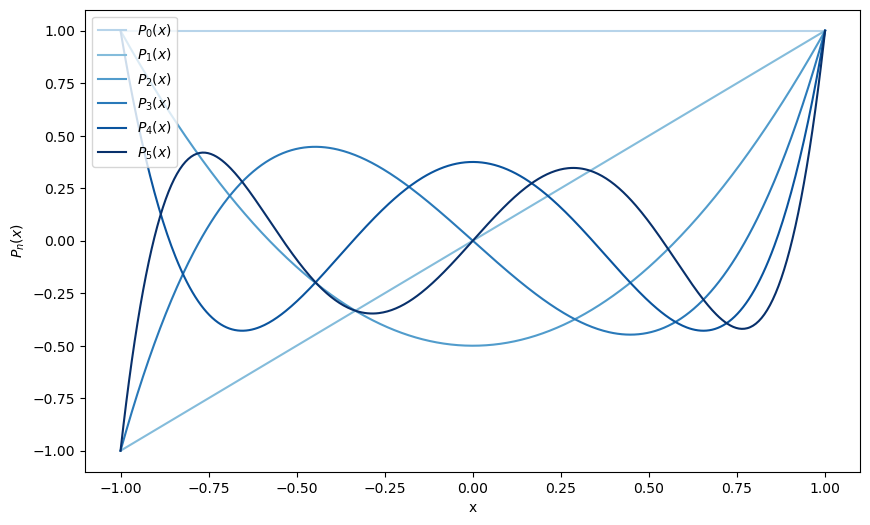

In [6]:
import matplotlib.pyplot as plt

# 设置 x 的范围
x_values = np.linspace(-1, 1, 500)
# 颜色设置
colors = plt.cm.Blues(np.linspace(0.3, 1, len(legendre_polynomials_r)))
# 绘制每个 Legendre 多项式的曲线
plt.figure(figsize=(10, 6))

for i, poly in enumerate(legendre_polynomials_r):
    y_values = poly(x_values)
    plt.plot(x_values, y_values, color=colors[i], label=f'$P_{i}(x)$')

# 添加标题和图例
plt.xlabel('x')
plt.ylabel('$P_n(x)$')
plt.legend(loc='upper left')

#### 离散最小二乘拟合

如果已知数据点 $(x_i,y_i)$ 和权 $w_i (i=1,2,\dots,m)$，我们可以构造带权 $\{w_i\}_{i=1}^m$ 的正交多项式，其递推关系是 

$$\begin{align*}
&p_0(x)=1\\
&p_1(x)=(x-\alpha_0)p_0(x)=x-\alpha_0\\
&p_{k+1}(x)=(x-\alpha_k)p_k(x)-\beta_{k-1}p_{k-1}(x)
\end{align*}$$

其中

$$\begin{align*}
&\alpha_k=\frac{\displaystyle\sum_{i=1}^mw_ix_ip_k^2(x_i)}{\displaystyle\sum_{i=1}^mw_ip_k^2(x_i)},\quad &k=0,1,\dots,n\\
&\beta_{k-1}=\frac{\displaystyle\sum_{i=1}^mw_ip_k^2(x_i)}{\displaystyle\sum_{i=1}^mw_ip_{k-1}^2(x_i)},\quad &k=1,2,\dots,n
\end{align*}$$

取正交多项式 $p_0(x),p_1(x),\dots,p_n(x)$，正规方程化简为 $$\langle p_k,p_k\rangle a_k=\langle y,p_k\rangle,\quad k=0,1,\dots,n$$ 那么 $n$ 次多项式 $P_n(x)=\displaystyle\sum_{k=0}^na_kp_k(x)$ 就是给定的数据集 $\{(x_i,y_i)\}_{i=1}^m$ 的最小二乘拟合.

> 【例 5.3】
>
> 今有数据点 $(x_i,y_i)$ 和权 $w_i$ 如下表所示. 用二次多项式以最小二乘法拟合这组数据.
>
> |$$x_i$$ | 0 | 0.5  | 0.6  | 0.7  | 0.8  | 0.9  | 1.0  |
> |--|--|--|--|--|--|--|--|
> |$$y_i$$ | 1 | 1.75 | 1.96 | 2.19 | 2.44 | 2.71 | 3.00 |
> |$$w_i$$ | 1 | 1    | 1    | 1    | 1    | 1    | 1    |

题目要求使用二次多项式，因此只需计算到 $g_2(x)=a_0p_0(x)+a_1p_1(x)+a_2p_2(x)$.

因为 $p_0(x)\equiv 1$，则 $p_0(x_i)=1$

|$$x_i$$ | 0 | 0.5  | 0.6  | 0.7  | 0.8  | 0.9  | 1.0  |
|--|--|--|--|--|--|--|--|
|$$y_i$$ | 1 | 1.75 | 1.96 | 2.19 | 2.44 | 2.71 | 3.00 |
|$$w_i$$ | 1 | 1    | 1    | 1    | 1    | 1    | 1    |
|$$p_0(x_i)$$ | 1 | 1    | 1    | 1    | 1    | 1    | 1    |

因此 $$\langle p_0,p_0\rangle=\sum_{i=0}^6w_ip_0^2(x_i)=7,\quad\langle y,p_0\rangle=\sum_{i=0}^6w_iy_ip_0(x_i)=15.05$$ $$a_0=\frac{\langle y,p_0\rangle}{\langle p_0,p_0\rangle}=2.15$$ 因此 $g_0(x)=a_0p_0(x)=a_0$. 对 $i=0,1,\dots,6$，有 $g_0(x_i)=2.15$

为了求 $p_1(x)$，我们确定 $$\alpha_0=\frac{\langle xp_0,p_0\rangle}{\langle p_0,p_0\rangle}=\frac{4.5}{7}=0.64285714$$ 因此 $p_1(x)=x-\alpha_0=x-0.64285714$. 在表格中更新了 $p_1(x)$ 的函数值. 

|$$x_i$$ | 0 | 0.5  | 0.6  | 0.7  | 0.8  | 0.9  | 1.0  |
|--|--|--|--|--|--|--|--|
|$$y_i$$ | 1 | 1.75 | 1.96 | 2.19 | 2.44 | 2.71 | 3.00 |
|$$w_i$$ | 1 | 1    | 1    | 1    | 1    | 1    | 1    |
|$$p_0(x_i)$$ | 1 | 1    | 1    | 1    | 1    | 1    | 1    |
|$$p_1(x_i)$$ | -0.64285714 | -0.14285714 | -0.04285714 | 0.05714286 | 0.15714286 | 0.25714286 | 0.35714286 |

类似地，我们得到 $$a_1=\frac{\langle y,p_1\rangle}{\langle p_1,p_1\rangle}=1.97826087$$ 因此 $g_1(x)=g_0(x)+a_1p_1(x)=2.15+1.97826087(x-0.64285714)$. 

为了求 $p_2(x)$，我们确定 $$\alpha_1=\frac{\langle xp_1,p_1\rangle}{\langle p_1,p_1\rangle}=\frac{0.22040816}{0.65714286}=0.33540373$$$$\beta_0=\frac{\langle p_1,p_1\rangle}{\langle p_0,p_0\rangle}=\frac{0.65714286}{7}=0.09387755$$ 因此 $p_2(x)=(x-\alpha_1)p_1(x)-\beta_0p_0(x)$. 在表格中更新了 $p_2(x)$ 的函数值. 

|$$x_i$$ | 0 | 0.5  | 0.6  | 0.7  | 0.8  | 0.9  | 1.0  |
|--|--|--|--|--|--|--|--|
|$$y_i$$ | 1 | 1.75 | 1.96 | 2.19 | 2.44 | 2.71 | 3.00 |
|$$w_i$$ | 1 | 1    | 1    | 1    | 1    | 1    | 1    |
|$$p_0(x_i)$$ | 1 | 1    | 1    | 1    | 1    | 1    | 1    |
|$$p_1(x_i)$$ | -0.64285714 | -0.14285714 | -0.04285714 | 0.05714286 | 0.15714286 | 0.25714286 | 0.35714286 |
|$$p_2(x_i)$$ | 0.12173913 |  -0.1173913 | -0.10521739 | -0.07304348 | -0.02086957 | 0.05130435 | 0.14347826 |

类似地，我们得到 $$a_2=\frac{\displaystyle\langle y,p_2\rangle}{\displaystyle\langle p_2,p_2\rangle}=1.0$$ 因此 $g_2(x)=g_1(x)+a_2p_2(x)=\frac{\displaystyle\langle y,p_0\rangle}{\displaystyle\langle p_0,p_0\rangle}+\frac{\displaystyle\langle y,p_1\rangle}{\displaystyle\langle p_1,p_1\rangle}(x-\alpha_0)+(x-\alpha_1)p_1(x)-\beta_0p_0(x)=x^2+x+1$. 

In [7]:
import numpy as np
from numpy.polynomial import Polynomial

def w(x):
    """权函数"""
    return 1  # 本例是 1

# 根据递推公式构造正交多项式
def orthogonal_polynomials(x, y, w, n):
    m = len(x)
    phi = [Polynomial([1])]  # p_0(x) = 1
    alpha = np.zeros(n + 1)
    beta = np.zeros(n)
    
    for k in range(n):
        alpha[k] = np.sum(w(x) * x * (phi[k](x) ** 2)) / np.sum(w(x) * (phi[k](x) ** 2))
        if k == 0:
            p_next = Polynomial([-alpha[k], 1])
        else:
            beta[k-1] = np.sum(w(x) * (phi[k](x) ** 2)) / np.sum(w(x) * (phi[k-1](x) ** 2))
            p_next = (Polynomial([-alpha[k], 1]) * phi[k]) - (beta[k-1] * phi[k-1])
        phi.append(p_next)
    
    return phi, alpha, beta

def least_squares_fit(x, y, phi, w, n):
    coefficients = np.zeros(n + 1)
    for k in range(n + 1):
        coefficients[k] = np.sum(w(x) * y * phi[k](x)) / np.sum(w(x) * (phi[k](x) ** 2))
    return coefficients

def construct_polynomial(coefficients, phi, n):
    g = Polynomial([0])
    for k in range(n + 1):
        g += coefficients[k] * phi[k]
    return g

# 设置数据
x = np.array([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y = np.array([1, 1.75, 1.96, 2.19, 2.44, 2.71, 3.00])

# 设置多项式的最高阶数
max_degree = 2
phi, alpha, beta = orthogonal_polynomials(x, y, w, max_degree)

# 计算系数
coefficients = least_squares_fit(x, y, phi, w, max_degree)

# 构建拟合多项式
g = construct_polynomial(coefficients, phi, max_degree)

print("拟合多项式的系数:", coefficients)
print("拟合多项式:", g)
print("在数据点上的拟合值:", g(x))

拟合多项式的系数: [2.15       1.97826087 1.        ]
拟合多项式: 1.000000000000001 + 0.9999999999999962·x¹ + 1.0000000000000022·x²
在数据点上的拟合值: [1.   1.75 1.96 2.19 2.44 2.71 3.  ]


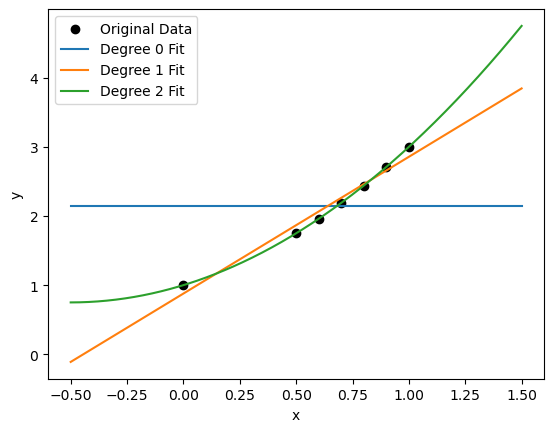

In [8]:
import matplotlib.pyplot as plt

# 数据
x = np.array([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y = np.array([1, 1.75, 1.96, 2.19, 2.44, 2.71, 3.00])

# 最高阶数
degrees = [0, 1, 2]

# 绘制数据点
plt.scatter(x, y, color='black', label='Original Data')

# 计算并绘制不同阶数的拟合多项式
for degree in degrees:
    phi, alpha, beta = orthogonal_polynomials(x, y, w, degree)
    coefficients = least_squares_fit(x, y, phi, w, degree)
    g = construct_polynomial(coefficients, phi, degree)
    
    # 绘制拟合曲线
    x_vals = np.linspace(-0.5, 1.5, 500)
    y_vals = g(x_vals)
    plt.plot(x_vals, y_vals, label=f'Degree {degree} Fit')

# 添加图例和标签
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### 过拟合

最小二乘法的目标是最小化数据点与拟合多项式之间的平方误差. 如果引入了更高次的多项式项，而这些项并没有显著地减少误差（或者说它们的影响微乎其微），那么拟合算法可能会分配给这些项非常小的系数，甚至接近于零.

尤其是，当数据点较少时，低次多项式已经可以很好地拟合数据. 此时，进一步增加多项式的次数可能只会增加模型的复杂度，而不会显著改善拟合效果.

下面一组数据的例子，扩展 $x$ 轴范围后，可以更清楚地看到高阶多项式的过拟合现象，尤其是在数据点之外的区域.

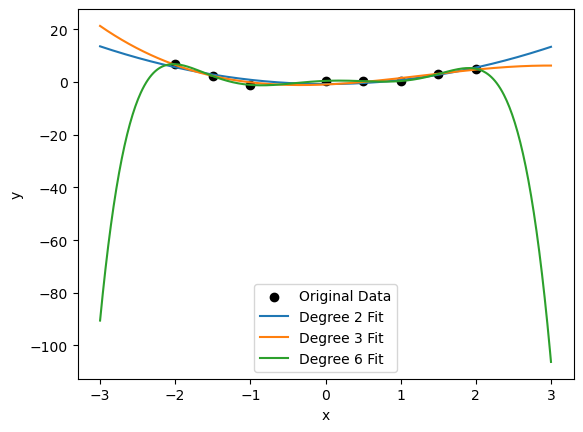

In [9]:
# 数据点
x = np.array([-2, -1.5, -1, 0, 0.5, 1, 1.5, 2])
y = np.array([5, 3, 0, 1, 0, 1, 3, 5]) + np.random.normal(0, 0.5, 8)  # 添加噪声

# 最高阶数
degrees = [2, 3, 6]

plt.scatter(x, y, color='black', label='Original Data')

for degree in degrees:
    phi, alpha, beta = orthogonal_polynomials(x, y, w, degree)
    coefficients = least_squares_fit(x, y, phi, w, degree)
    g = construct_polynomial(coefficients, phi, degree)
    
    x_vals = np.linspace(-3, 3, 500)
    y_vals = g(x_vals)
    plt.plot(x_vals, y_vals, label=f'Degree {degree} Fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()